## Review (3)

Thank you for the update. Now everything is correct, so I'm accepting your project. Good luck.

---

# Review (2)

Sorry for the long delay in reviewing. I spent some time to find out what's wrong. There was an issue with visits data on our site, so I added some code to your project to fix it. We have two points to fix, and then I can approve your project. I left hints for you; please look through them. If you have any questions, please ask me with the next iteration.

---

## Review

Hi Sheryl. This is Soslan again. I was reviewing your previous project. I'm sorry for so much waiting time. As always I've added all my comments to new cells with different coloring.

<div class="alert alert-success" role="alert">
  If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work so I can accept it then the color will be red
</div>

You did some of the tasks correctly but merging of datasets was a mistake. You don't need to do this. I write you comments why. During second `cac_source` merge kernel even dies. Can you please look through my comments and work on them. Thanks.

---

### Project Description

You've done beautifully in the Practicum course, and you've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.
You have:
•	Server logs with data on Yandex.Afisha visits from January 2017 through December 2018
•	Dump file with all orders for the period
•	Marketing expenses statistics

You are going to study:
•	How people use the product
•	When they start to buy
•	How much money each customer brings
•	When they pay off


## Step 1. Download the data and prepare it for analysis 

In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Download datasets. Store the data on visits, orders, and expenses in variables. 

In [39]:
visits = pd.read_csv('/datasets/visits_log_us.csv', 
                     dtype={'Device': 'category'},
                    parse_dates=['Start Ts', 'End Ts'])
#visits.head()

In [40]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


<div class="alert alert-warning" role="alert">
<s>There is an issue with `visits_log_us.csv`, so I added some extra code to parse dates correctly. Otherwise, standard read_csv parser make errors in ambiguous dates like 01.07.2017</s>
</div>

In [42]:
# reviewer's code

visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='%d.%m.%Y %H:%M')
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='%d.%m.%Y %H:%M')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [43]:
orders = pd.read_csv('/datasets/orders_log_us.csv',
                    parse_dates=['Buy Ts'])
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [44]:
costs = pd.read_csv('/datasets/costs_us.csv',
                   parse_dates=['dt'])
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [45]:
orders['Buy Ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: Buy Ts, dtype: object

In [46]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

The range of expense dates coincides with that of order dates. This will help to build cohorts later.

### Optimize the data for analysis. Make sure each column contains the correct data type.

In [47]:
visits.info(memory_usage='deep')    #BEFORE OPTIMIZATION - memory usage: 77.0 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [48]:
orders.info(memory_usage='deep')    #BEFORE OPTIMIZATION - memory usage: 4.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [49]:
costs.info(memory_usage='deep')     #BEFORE OPTIMIZATION - memory usage: 206.2 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


#### Conclusion

Very impressive reduction in memory usage, particularly 'object' to 'category'. Parse_dates alone resulted in a 71-72% decrease, parse_dates plus dtype resulted in a 85% memory usage decrease for the 'visits' table.

Data types are correct. 

<div class="alert alert-success" role="alert">
Nice start</div>

### Merging tables. Renaming columns.

In [50]:
#users_data = pd.merge(visits, orders, on='Uid')   # no merge - FIXED  

<div class="alert alert-danger" role="alert">
<s>I didn't understand the idea of merging visits and orders. What this table we should use for? You killed all visits of users without orders and dublicated visits of users by number of their orders :)</s></div>

<div class="alert alert-success" role="alert">
Fixed</div>

In [51]:
def get_info(attr, *dfs):
    return list(map(lambda x: getattr(x, attr), dfs))
get_info('shape', visits, orders, costs)

[(359400, 5), (50415, 3), (2542, 3)]

In [52]:
#reusable anywhere to improve column names
#def to_clean(val):
#    return val.strip().lower().replace(" ", "_")
#users_data = users_data.rename(columns=to_clean)

In [53]:
#users_data

In [54]:
def to_clean(val):
    return val.strip().lower().replace(" ", "_")
visits = visits.rename(columns=to_clean)

In [55]:
#cac_source = pd.merge(visits, costs, on='source_id')

<div class="alert alert-danger" role="alert">
<s>Kernel dies here. I don't think that you need to merge this two tables too. Because in costs you have monthly spendings of each channel and in visits you just have visits.</s> </div>

<div class="alert alert-success" role="alert">
Fixed</div>

In [56]:
#cac_source

 ## Step 2. Make reports and calculate metrics:

<div class="alert alert-danger" role="alert">
<s>For next steps you don't need any information about orders. So can you please do them with visits dataframe? All the calculations with users_data are not correct.</s></div>

#### 1. Product 1. How many people use it every day, week, and month? 2. How many sessions are there per day? (One user might have more than one session.) 3. What is the length of each session? 4. How often do users come back?

#### 1. Number of Active Users by Day, Week and Month

In [57]:
#users_data['session_start_ts'] = pd.to_datetime(users_data['start_ts'], format="%Y-%m-%d %H:%M")
#users_data['session_end_ts'] = pd.to_datetime(users_data['end_ts'], format="%Y-%m-%d %H:%M")
#users_data['session_end_ts'] = pd.to_datetime(users_data['buy_ts'], format="%Y-%m-%d %H:%M") # looks like mistake
#users_data['session_year']  = users_data['start_ts'].dt.year
#users_data['session_month'] = users_data['start_ts'].dt.month
#users_data['session_week']  = users_data['start_ts'].dt.week
#users_data['session_date'] = users_data['start_ts'].dt.date

<div class="alert alert-warning" role="alert">
I made a mistake when told you during the previous review, that you didn't need `session_year` actually you need it because you used `.dt.week` and this is just number, not exact week start as in case of `.astype('datetime64[M]')` So we got intersection when our data range is in several years. So I fixed the mistake by myself. Sorry for this.</div>

In [58]:
# FIXED   FIXED   FIXED   FIXED   FIXED
visits['session_start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")
visits['session_end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")

visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

visits.head()

,device,end_ts,source_id,start_ts,uid,session_start_ts,session_end_ts,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,12,52,2017-12-27


In [59]:
#mau_total = users_data.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean() # you don't need here to group by year
#dau_total = users_data.groupby(['session_year', 'session_date']).agg({'uid': 'nunique'}).mean() # you don't need here to group by year
#wau_total = users_data.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean() # you don't need here to group by year
#print('Daily active users =',int(dau_total))
#print('Weekly active users =',int(wau_total))
#print('Monthly active users =',int(mau_total))

In [60]:
# FIXED   FIXED   FIXED   FIXED   FIXED
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean() # you don't need here to group by year
dau_total = visits.groupby(['session_date']).agg({'uid': 'nunique'}).mean() # you don't need here to group by year
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean() # you don't need here to group by year
print('Daily active users =',int(dau_total))
print('Weekly active users =',int(wau_total))
print('Monthly active users =',int(mau_total))

Daily active users = 907
Weekly active users = 5716
Monthly active users = 23228


<div class="alert alert-success" role="alert">
Correctly now :) we did it together.</div>

#### Number of Sessions per User per Month

In [61]:
#sessions_per_user = users_data.groupby(['session_year', 'session_month']).agg({'uid': ['count','nunique']})
#sessions_per_user.columns = ['n_sessions', 'n_users']
#sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
#sessions_per_user.head()

In [62]:
# FIXED   FIXED   FIXED   FIXED   FIXED
sessions_per_user = visits.groupby(['session_month']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user.head()

,n_sessions,n_users,sessions_per_user
session_month,,,
1,36939,28716,1.286356
2,37182,28749,1.293332
3,35679,27473,1.298693
4,26515,21008,1.262138
5,26635,20701,1.286653


#### 2. Number of sessions per User per Day

In [63]:
#sessions_per_user_date = users_data.groupby(['session_year', 'session_date']).agg({'uid': ['count','nunique']})
#sessions_per_user_date.columns = ['n_sessions_date', 'n_users_date']
#sessions_per_user_date['sessions_per_user_date'] = sessions_per_user_date['n_sessions_date'] / sessions_per_user_date['n_users_date']
#sessions_per_user_date.head()

In [64]:
# FIXED   FIXED   FIXED   FIXED   FIXED
sessions_per_user_date = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user_date.columns = ['n_sessions_date', 'n_users_date']
sessions_per_user_date['sessions_per_user_date'] = sessions_per_user_date['n_sessions_date'] / sessions_per_user_date['n_users_date']
sessions_per_user_date.head()

,n_sessions_date,n_users_date,sessions_per_user_date
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [65]:
#users_data.head(10)

<div class="alert alert-success" role="alert">
Great</div>

#### 3. Find the ASL (Average Session Length) 

In [66]:
#users_data['session_duration_sec'] = (users_data['end_ts'] - users_data['start_ts']).dt.seconds
#asl = users_data['session_duration_sec'].mode()
#asl

In [67]:
# FIXED   FIXED   FIXED   FIXED   FIXED
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
asl = visits['session_duration_sec'].mode()
asl

0    60
dtype: int64

Average session length is 60 seconds.

<div class="alert alert-success" role="alert">
Mode is correct choice here</div>

#### 4. There's also the sticky factor. This metric tells you how loyal the audience is — how often they return to the app. 

In [68]:
sticky_wau = dau_total/wau_total*100
#print(sticky_wau)
print(int(sticky_wau),'users come back to the app each week.')
sticky_mau = dau_total/mau_total*100
#print(sticky_mau)
print(int(sticky_mau),'users come back to the app each month.')

15 users come back to the app each week.
3 users come back to the app each month.


<div class="alert alert-success" role="alert">
Overall correct step. Very good.</div>


### 2.	Sales 1. When do people start buying? 2. How many orders do they make during a given period of time? 3. What is the average purchase size? 4. How much money do they bring? (LTV)

### 1. When do people start buying? -- all new and FIXED

In [69]:
orders['first_buy_ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M")

orders['first_buy_date'] = orders['first_buy_ts'].dt.date
orders

,Buy Ts,Revenue,Uid,first_buy_ts,first_buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31


In [70]:
min_order_date = orders.groupby('Uid')['first_buy_date'].min() 
min_order_date

Uid
313578113262317         2018-01-03
1575281904278712        2017-06-03
2429014661409475        2017-10-11
2464366381792757        2018-01-28
2551852515556206        2017-11-24
                           ...    
18445147675727495770    2017-11-24
18445407535914413204    2017-09-22
18445601152732270159    2018-03-26
18446156210226471712    2018-02-18
18446167067214817906    2017-10-17
Name: first_buy_date, Length: 36523, dtype: object

In [71]:
min_order_date.name = 'min_order_date'

In [72]:
orders = orders.join(min_order_date, on='Uid')
orders

,Buy Ts,Revenue,Uid,first_buy_ts,first_buy_date,min_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31


In [73]:
min_visit_date = visits.groupby('uid')['session_date'].min() 
min_visit_date

uid
11863502262781          2018-03-01
49537067089222          2018-02-06
297729379853735         2017-06-07
313578113262317         2017-09-18
325320750514679         2017-09-30
                           ...    
18446403737806311543    2017-11-30
18446424184725333426    2017-12-06
18446556406699109058    2018-01-01
18446621818809592527    2017-12-27
18446676030785672386    2017-10-04
Name: session_date, Length: 228169, dtype: object

In [74]:
min_visit_date.name = 'min_visit_date'

In [75]:
visits = visits.join(min_visit_date, on='uid')
visits

,device,end_ts,source_id,start_ts,uid,session_start_ts,session_end_ts,session_year,session_month,session_week,session_date,session_duration_sec,min_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,7,26,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20,1440,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,12,52,2017-12-27,0,2017-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00,2017-07-29 19:07:19,2017,7,30,2017-07-29,19,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00,2018-01-25 17:38:19,2018,1,4,2018-01-25,19,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00,2018-03-03 10:12:19,2018,3,9,2018-03-03,19,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00,2017-11-02 10:12:19,2017,11,44,2017-11-02,19,2017-11-02


In [76]:
#start_to_buy = orders['min_order_date'] - visits['min_visit_date']
#start_to_buy

In [77]:
#start_to_buy.mean()

## New Section     New Section     New Section

In [78]:
orders_new = orders.groupby('Uid')['min_order_date'].nunique().reset_index()
#orders_new

In [79]:
visits_new = visits.groupby(['uid'])['min_visit_date'].nunique().reset_index()
#visits_new

In [80]:
purchased = orders_new.merge(visits_new, left_on='Uid', right_on='uid')

In [81]:
purchased['Uid'].nunique()

36523

In [82]:
purchased.drop(purchased.columns[[1,3]], axis=1, inplace=True)

In [83]:
#purchased

In [84]:
purch_date = purchased.join(min_order_date, on='Uid')
#purch_date

In [85]:
vis_date = purchased.join(min_visit_date, on='uid')
#vis_date

In [86]:
days_to_buy = purch_date['min_order_date'] - vis_date['min_visit_date']
days_to_buy.head(10)

0   107 days
1     0 days
2     0 days
3     1 days
4     0 days
5     0 days
6    37 days
7     0 days
8     0 days
9     0 days
dtype: timedelta64[ns]

In [87]:
days_to_buy.mean()

Timedelta('16 days 21:30:05.864797')

#### Conclusion: People start to buy 16 days after their first visit on average.

<div class="alert alert-danger" role="alert">
<s>I think you made a mistake here as we subtract from orders['min_order_date'] first 50415 elements of visits['min_visit_date'], but without synchronization by uid. I see the correct solution in the inner join of min_order_date and min_visit_date by uid, so we receive for each user who made an order his first visit time. And then you can subtract two columns of this merged data.  Negative values also say that something wrong happened as the user cannot order before the visit.</s></div>

<div class="alert alert-success" role="alert">
Fixed</div>

In [88]:
#### Conclusion: People start to buy 42 days after their first visit on average.

In [89]:
#### 1. People start buying on the first order date. -- FIXED -- replaced by work above

<div class="alert alert-danger" role="alert">
    <s>I think here you should look first visit date and compare with first order data</s></div>

In [90]:
first_order_date_by_customers = orders.groupby('Uid')['Buy Ts'].min() 
#first_order_date_by_customers.head()

In [91]:
first_order_date_by_customers.name = 'first_order_date'

In [92]:
new_orders = orders.join(first_order_date_by_customers,on='Uid') 
new_orders.head()

,Buy Ts,Revenue,Uid,first_buy_ts,first_buy_date,min_order_date,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01 07:58:00


In [93]:
#improve column names
def to_clean(val):
    return val.strip().lower().replace(" ", "_")
new_orders = new_orders.rename(columns=to_clean)

In [94]:
new_orders['first_order_month'] = new_orders['first_order_date'].astype('datetime64[M]')
new_orders['order_month'] = new_orders['buy_ts'].astype('datetime64[M]')
new_orders.head()

,buy_ts,revenue,uid,first_buy_ts,first_buy_date,min_order_date,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01


#### 2. How many orders do they make during a month?

In [95]:
new_orders.pivot_table(index='first_order_month',
                        columns='order_month',
                        values='uid',
                        aggfunc='count') 

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0,NaN
2017-07-01,NaN,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN
2017-08-01,NaN,NaN,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN
2017-09-01,NaN,NaN,NaN,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,5052.0,270.0,202.0,179.0,86.0,105.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3783.0,224.0,159.0,64.0,78.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4095.0,222.0,83.0,70.0,NaN


The first month of any group is very high, then falls off sharply and remains low but steady. I think this reflects a large number of one time purchases and a small but steady number of loyal customers. 

#### 3. Average purchase size

In [96]:
cohort_grouped_avg = new_orders.groupby('first_order_month').agg({'uid':'nunique','revenue':'mean'})
cohort_grouped_avg  

,uid,revenue
first_order_month,,
2017-06-01,2023,5.414982
2017-07-01,1923,5.542241
2017-08-01,1370,5.304506
2017-09-01,2581,8.941805
2017-10-01,4340,4.596744
2017-11-01,4081,4.423558
2017-12-01,4383,5.681327
2018-01-01,3373,3.867950
2018-02-01,3651,3.747315


#### 4. How much money did they bring? (LTV calculated later)

In [97]:
cohort_grouped = new_orders.groupby('first_order_month').agg({'uid':'nunique','revenue':'sum'})
cohort_grouped

,uid,revenue
first_order_month,,
2017-06-01,2023,24031.69
2017-07-01,1923,16127.92
2017-08-01,1370,11606.26
2017-09-01,2581,34676.32
2017-10-01,4340,27603.45
2017-11-01,4081,26098.99
2017-12-01,4383,33485.74
2018-01-01,3373,16663.13
2018-02-01,3651,16750.50


December had the most users. September was the highest revenue month, followed by December. The holiday period October through December has good revenue. January through May sales slump. June is a good revenue month.

Users were spending more in June and September. Half as many users (June, September) brought in a similar revenue as October, November and December. 


<div class="alert alert-success" role="alert">
Looks correct</div>

In [98]:
orders_grouped_by_cohorts = new_orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})
#orders_grouped_by_cohorts.head()

In [99]:
orders_grouped_by_cohorts['revenue_per_user']=orders_grouped_by_cohorts['revenue']/orders_grouped_by_cohorts['uid']

#### Average revenue per User

In [100]:
orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                      columns='order_month',
                                      values='revenue_per_user',
                                      aggfunc='mean')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


#### cohort lifetime

In [101]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
#orders_grouped_by_cohorts['cohort_lifetime'].head()

In [102]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
#print(orders_grouped_by_cohorts['cohort_lifetime'].head())

In [103]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
#print(orders_grouped_by_cohorts[['first_order_month','order_month','cohort_lifetime']].head())
#print(orders_grouped_by_cohorts[['first_order_month','order_month','cohort_lifetime']].tail())

In [104]:
orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y')

0     01.06.2017
1     01.06.2017
2     01.06.2017
3     01.06.2017
4     01.06.2017
         ...    
74    01.03.2018
75    01.04.2018
76    01.04.2018
77    01.05.2018
78    01.06.2018
Name: first_order_month, Length: 79, dtype: object

In [105]:
orders_grouped_by_cohorts['first_order_month']=orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')

#### Average revenue per user, per cohort lifetime

In [106]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                                               columns='cohort_lifetime',
                                                               values='revenue_per_user',
                                                               aggfunc='mean')
#print(revenue_per_user_pivot)

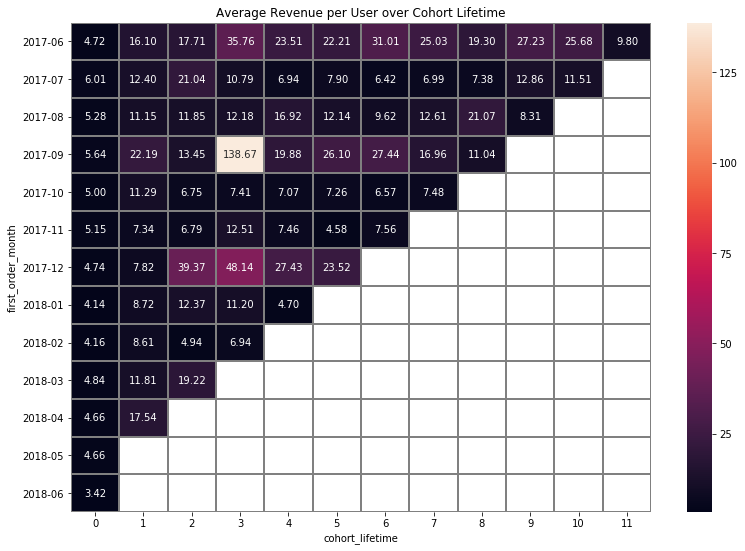

In [107]:
plt.figure(figsize=(13, 9))
plt.title('Average Revenue per User over Cohort Lifetime')
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

Here we see clearly for which cohorts revenue per user increased in the month following the month of first purchase. For some cohorts, revenue per user increased rapidly over time (for instance, the December 2017 cohorts).

This heatmap shows clearly that September is the highest month. There is also an obvious spike in per user spending in the 4th cohort period.

<div class="alert alert-warning" role="alert">
Here you calculated average purchase in each cohort buyers each month. OK but this was an extra work</div>

### Users Lifetime Value (LTV) and Cost of Acquisition (CAC)

In [108]:
#retrieve the month of each customer's first purchase
first_orders = new_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
#first_orders.head()

In [109]:
#calculate the number of new customers (n_buyers) for each month
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [110]:
#group the table of orders by month of first purchase and month of purchase and sum up the revenue
cohorts = new_orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


The row of the cohort table specifies the revenue the cohort brought. For example, from the 0 row we can see that the customers who placed their first order in June 2017 brought in a total revenue of $9557.49 that month.

In [111]:
#LTV is a cohort's cumulative revenue
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


<div class="alert alert-warning" role="alert">
<s>We don't have any information about margin rate so we can consider is as 1, and calculate LTV on basis of revenue.</s></div>

<div class="alert alert-success" role="alert">
Fixed</div>

In [112]:
#LTV is calculated on the basis of gross profit rather than revenue, 
#we need to find the gross profit by multiplying revenue by profitability with a 50% profit margin
#margin_rate = .5

#report['gp'] = report['revenue'] * margin_rate
#report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
#report['age'] = report['age'].round().astype('int')

#report.head()

In [113]:
# FIXED    FIXED    FIXED
#staying with the formula, but replaced margin rate as 1
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#report.head()

#### LTV

In [114]:
#calculate LTV. Divide the cohort's gross profit for each month by the total number of users in each cohort.
report['ltv'] = report['gp'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531


In [115]:
output = report.pivot_table(
                            index='first_order_month', 
                            columns='age', 
                            values='ltv', 
                            aggfunc='mean').cumsum(axis=1)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


<div class="alert alert-success" role="alert">
Great. LTV calculated correctly.</div>

#### Calculating LTV and CAC

In [116]:
# calculating the costs per month
monthly_costs = costs[['dt','costs']].groupby('dt').sum()
#monthly_costs.head()

#### Cost of Acquisition (CAC) 

In [117]:
#add the data on costs to the report and calculate CAC:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='dt')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_  

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,735.26,0.363450
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,735.26,0.363450
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,735.26,0.363450
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,735.26,0.363450
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,735.26,0.363450
...,...,...,...,...,...,...,...,...,...
71,2018-02-01,3651,2018-05-01,270.70,270.70,3,0.074144,1378.76,0.377639
72,2018-03-01,3533,2018-03-01,17095.49,17095.49,0,4.838803,1437.28,0.406816
73,2018-03-01,3533,2018-04-01,1063.05,1063.05,1,0.300892,1437.28,0.406816
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559,1437.28,0.406816


Investment in customer acquisition paid off and even led to profit during the first month. After the first month the cost of acquisition compared to the value of the customer fluctuates, but overall does not look good. A better asessment will be calculating the ROI.

##### marketing is in last step -- FIXED

In [118]:
#### Calculating cost of CAC from each of the ad sources -- marketing is in last step # FIXED

<div class="alert alert-danger" role="alert">
<s>I'm not sure we can calculate with table where you merge visits with monthly costs. Marketing is in the last step.</s>
</div>

In [119]:
# make a smaller df
#cac_source2 = cac_source[['uid', 'source_id', 'costs']]
#cac_source2

In [120]:
#cac_source3 = cac_source2.groupby('source_id').agg({'uid':'nunique','costs':'sum'})
#cac_source3

In [121]:
#cacq = cac_source3['costs']  / cac_source3['uid'] 

In [122]:
#### 2. Cost of CAC from each of the ad sources -- marketing is in last step # FIXED

In [123]:
#cacq.round(2)

In [124]:
#The cost of customer acquisition is high for source number 3. -- conclusion old

In [125]:
#### ROI -- moved to bottom of marketing section # SAME TABLE - CHANGED LOCATION

In [126]:
# SAME TABLE - CHANGED LOCATION
#ROMI (return on marketing investment) by dividing LTV by CAC
#report_['romi'] = report_['ltv'] / report_['cac']
#output = report_.pivot_table(
#    index='first_order_month', 
#    columns='age', 
#    values='romi', 
#    aggfunc='mean')

#output.cumsum(axis=1).round(2)

In [127]:
#The Return on Marketing Investment is highest in September. Overall the ROI increases each month for each cohort.

### 3.	Marketing 1. How much money was spent? Overall/per source/over time 2. How much did customer acquisition from each of the sources cost? 3. How worthwhile where the investments? (ROI)

#### Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

#### 1a. Marketing money spent overall

In [128]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
#costs_by_source['costs'].sum().round(2)
print('The Marketing money spent overall was',costs_by_source['costs'].sum().round(2))

The Marketing money spent overall was 329131.62


#### 1b. Marketing money spent per source

In [129]:
#df2 -- changed to a more meaningful name
costs_by_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


The costs are high for source number 3. One would hope there was great revenue for number 3, making the expense worthwhile. Later, we will find out that the revenue is not that great, therefore source 3 is not worth it.

<div class="alert alert-success" role="alert">
Correct.</div>

#### 1c. Marketing money spent over time

In [130]:
monthly_costs = costs[['dt','costs']].groupby('dt').sum()
monthly_costs

,costs
dt,
2017-06-01,735.26
2017-06-02,721.19
2017-06-03,450.85
2017-06-04,761.16
2017-06-05,821.44
...,...
2018-05-27,532.87
2018-05-28,619.44
2018-05-29,784.79


#### 2. Cost of CAC from each of the ad sources

In [131]:
#cacq.round(2)  # FIXED    FIXED

In [132]:
unique_visits_with_source = visits[['source_id','uid']].groupby('source_id').agg({'uid': 'nunique'})    
unique_visits_with_source

,uid
source_id,
1,18999
2,26245
3,74756
4,83525
5,56974
6,6
7,34
9,9264
10,8067


<div class="alert alert-warning" role="alert">
Here you consider as a customer each visitor, but probably it is better to calculate CAC of the visitors who made orders.</div>

In [133]:
cac_per_source = costs_by_source['costs'] / unique_visits_with_source['uid']
cac_per_source

source_id
1     1.096546
2     1.631017
3     1.890439
4     0.731201
5     0.908434
6          NaN
7          NaN
9     0.595584
10    0.721766
dtype: float64

In [134]:
#cacq.plot.bar(stacked=False, rot=0, figsize=(10,8),title='Cost of CAC by Advertising Source', alpha=0.7)
#plt.ylabel('Costs in USD')

Text(0, 0.5, 'Costs in USD')

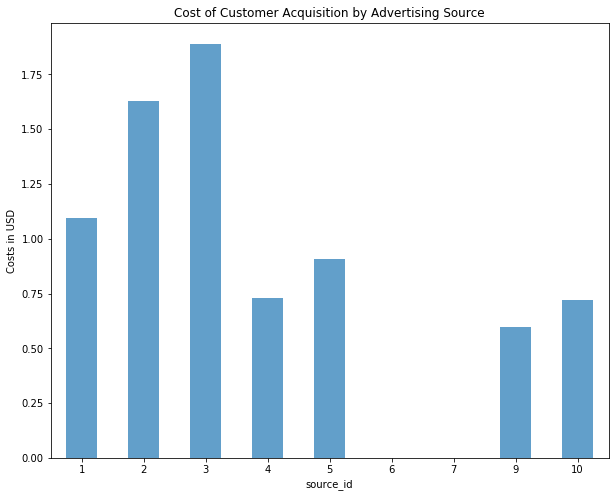

In [135]:
cac_per_source.plot.bar(stacked=False, rot=0, figsize=(10,8),title='Cost of Customer Acquisition by Advertising Source', alpha=0.7)
plt.ylabel('Costs in USD')

#### 3. How worthwhile were the investments (ROI)

In [136]:
#ROMI (return on marketing investment) by dividing LTV by CAC
report_['romi'] = report_['ltv'] / report_['cac']
roi_output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

roi_output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,13.00,14.33,15.54,18.16,20.98,23.00,25.62,27.22,28.74,30.41,31.98,32.68
2017-07-01,30.57,32.28,35.45,37.28,38.17,38.97,39.58,40.30,41.12,41.87,42.66,NaN
2017-08-01,14.20,15.47,16.71,17.76,19.09,19.85,20.42,21.51,22.30,22.80,NaN,NaN
2017-09-01,27.04,32.39,34.89,53.94,55.86,58.96,62.32,63.48,64.36,NaN,NaN,NaN
2017-10-01,20.94,23.18,23.98,24.64,25.27,25.77,26.13,26.61,NaN,NaN,NaN,NaN
2017-11-01,17.01,18.33,18.99,20.06,20.55,20.73,21.11,NaN,NaN,NaN,NaN,NaN
2017-12-01,19.55,20.63,24.44,28.84,30.13,31.53,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,16.25,17.40,18.60,19.16,19.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,11.01,11.74,11.95,12.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conclusion: The Return on Marketing Investment is highest in September. Overall the ROI increases each month for each cohort.

<div class="alert alert-danger" role="alert">
<s>Please do this with orders dataframe</s></div>

In [137]:
#df = users_data.groupby('source_id').agg({'revenue':'sum'}).round(2) # FIXED -- users_data removed
#df

In [138]:
#money = pd.merge(df, df2, on='source_id') 
#money

In [139]:
#money.plot.bar(stacked=False, rot=0, figsize=(10,8),title='Revenue and Overall Costs by Advertising Source', alpha=0.7)
#plt.ylabel('Revenue and Costs in USD')

In [140]:
#Revenue is significantly higher than costs. The ratio of cost to revenue shows Source 1 as the best performing ad source. Source 3 should be examined and either removed or improved.

### NEW -New work to determine Revenue and Costs per Advertising Source

In [141]:
#new_visits = visits[['uid', 'device', 'source_id']]  
#new_visits

In [142]:
#visits.head()

In [143]:
#revenue_orders = orders[['Uid','Revenue']]
#revenue_orders

In [144]:
#def to_clean(val):
 #   return val.strip().lower().replace(" ", "_")
#revenue_orders = revenue_orders.rename(columns=to_clean)

<div class="alert alert-danger" role="alert">
<s>Your goal here is to find source id for each order. In your final data frame number of rows should be equal to a number of orders. If it is not so means something goes wrong.
    
It is bad idea to merge visits with orders by uid as we have several visits and orders for some users and again obtain duplicating. You can first group visits and select first for each uid. and after then merge with orders. And so for each order, you will know source from which user came.</s></div>

Next code should help. Next cell works for some time. Also please look through the rest of the project.

In [145]:
#%%time
#reviewer's code

new_visits = visits.sort_values('session_start_ts').groupby('uid').first()

In [146]:
source_id_per_order = pd.merge(new_visits, orders, left_index=True, right_on='Uid')
source_id_per_order

,device,end_ts,source_id,start_ts,session_start_ts,session_end_ts,session_year,session_month,session_week,session_date,session_duration_sec,min_visit_date,Buy Ts,Revenue,Uid,first_buy_ts,first_buy_date,min_order_date
27944,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18 22:49:00,2017-09-18 23:07:00,2017,9,38,2017-09-18,1080,2017-09-18,2018-01-03 21:51:00,0.55,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-03
213,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-03 10:17:00,2017,6,22,2017-06-03,240,2017-06-03,2017-06-03 10:13:00,1.22,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-03
252,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-03 10:17:00,2017,6,22,2017-06-03,240,2017-06-03,2017-06-03 17:39:00,1.83,1575281904278712,2017-06-03 17:39:00,2017-06-03,2017-06-03
12235,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2017-10-11 17:14:00,2017-10-11 17:27:00,2017,10,41,2017-10-11,780,2017-10-11,2017-10-11 18:33:00,73.33,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-11
31462,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2018-01-27 20:10:00,2018-01-27 20:13:00,2018,1,4,2018-01-27,180,2018-01-27,2018-01-28 15:54:00,2.44,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,desktop,2017-09-22 23:55:00,3,2017-09-22 23:48:00,2017-09-22 23:48:00,2017-09-22 23:55:00,2017,9,38,2017-09-22,420,2017-09-22,2017-09-24 23:48:00,0.24,18445407535914413204,2017-09-24 23:48:00,2017-09-24,2017-09-22
9023,desktop,2017-09-22 23:55:00,3,2017-09-22 23:48:00,2017-09-22 23:48:00,2017-09-22 23:55:00,2017,9,38,2017-09-22,420,2017-09-22,2017-09-25 15:56:00,0.12,18445407535914413204,2017-09-25 15:56:00,2017-09-25,2017-09-22
42213,desktop,2017-08-07 11:52:00,2,2017-08-07 11:51:00,2017-08-07 11:51:00,2017-08-07 11:52:00,2017,8,32,2017-08-07,60,2017-08-07,2018-03-26 22:54:00,4.22,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03-26
35572,desktop,2017-11-07 10:04:00,3,2017-11-07 10:01:00,2017-11-07 10:01:00,2017-11-07 10:04:00,2017,11,45,2017-11-07,180,2017-11-07,2018-02-18 19:34:00,9.78,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02-18


In [147]:
#making smaller # of columns - row count matches rows in orders
source_id_per_order2 = source_id_per_order[['source_id', 'Revenue', 'Uid']] 
source_id_per_order2

,source_id,Revenue,Uid
27944,2,0.55,313578113262317
213,10,1.22,1575281904278712
252,10,1.83,1575281904278712
12235,3,73.33,2429014661409475
31462,5,2.44,2464366381792757
...,...,...,...
8919,3,0.24,18445407535914413204
9023,3,0.12,18445407535914413204
42213,2,4.22,18445601152732270159
35572,3,9.78,18446156210226471712


In [148]:
source_id_per_order2['Uid'].nunique() #got sum of Uid to make sure of accurate count by source id

36523

In [149]:
revenue_by_source_id = source_id_per_order2.groupby('source_id').agg({'Uid': 'nunique', 'Revenue':'sum'})
revenue_by_source_id

,Uid,Revenue
source_id,,
1,2899,31090.55
2,3506,46923.61
3,10473,54511.24
4,10296,56696.83
5,6931,52624.02
7,1,1.22
9,1088,5759.40
10,1329,4450.33


In [150]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [151]:
money = pd.merge(revenue_by_source_id, costs_by_source, on='source_id')
money

,Uid,Revenue,costs
source_id,,,
1,2899,31090.55,20833.27
2,3506,46923.61,42806.04
3,10473,54511.24,141321.63
4,10296,56696.83,61073.60
5,6931,52624.02,51757.10
9,1088,5759.40,5517.49
10,1329,4450.33,5822.49


In [152]:
#device_revenue = revenue_orders.merge(new_visits, on='uid', how='left') 

In [153]:
#device_revenue.drop_duplicates()

In [154]:
#revenue_by_source = device_revenue.groupby('source_id').agg({'revenue':'sum'}).round(2)
#revenue_by_source

In [155]:
#money = pd.merge(revenue_by_source, costs_by_source, on='source_id')
#money

Text(0, 0.5, 'Revenue and Costs in USD')

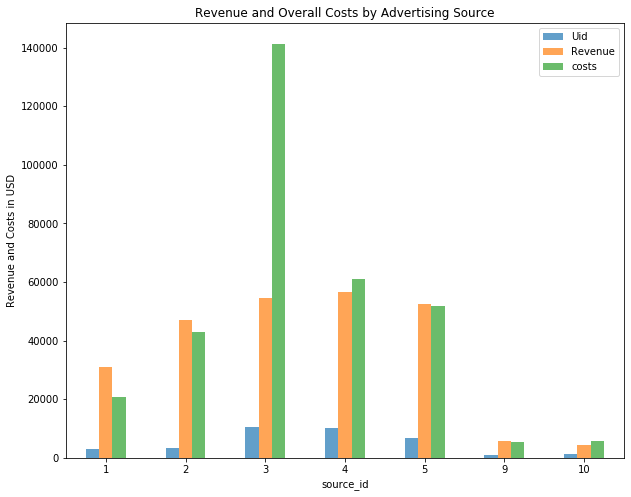

In [156]:
money.plot.bar(stacked=False, rot=0, figsize=(10,8),title='Revenue and Overall Costs by Advertising Source', alpha=0.7)
plt.ylabel('Revenue and Costs in USD')

OLD: Revenue is significantly higher than costs. The ratio of cost to revenue shows Source 1 as the best performing ad source. Source 3 costs too much for the revenue returned. Source 3 should be examined and either removed or improved.

NEW Conclusion: Revenue is no longer significantly higher than costs. The ratio of cost to revenue shows Source 1 is the best. Source 2 and 5 are second best performing. Source 5 is reaching more users. Source 3 needs to be removed, it cost more than twice the revenue. Source 6, 7, 8 cost nothing and have no revenue, except $1.22 revenue from one user in Source 7. 

<div class="alert alert-success" role="alert">
Nice fix. Now everything is correct.</div>

In [124]:
#group_by_device = new_visits[['device','uid']].groupby('device').count()
#group_by_device

In [121]:
group_by_device = source_id_per_order[['device','Uid']].groupby('device').count()
group_by_device

,Uid
device,
desktop,40927
touch,9488


Text(0, 0.5, 'Number of Users')

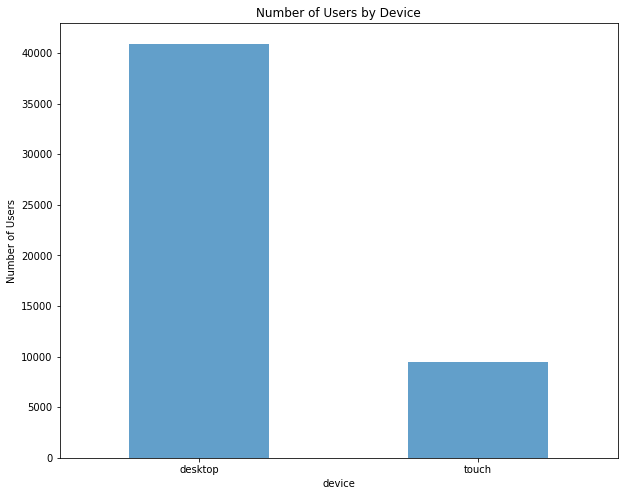

In [122]:
group_by_device.plot.bar(stacked=False, rot=0, figsize=(10,8),title='Number of Users by Device', alpha=0.7, legend=False)
plt.ylabel('Number of Users')

For this data, desktop far outweighs 'touch' devices. There may be additional market share if the 'touch' app is improved. Also, less opportunity for push notifications and impulse purchases on a desktop.

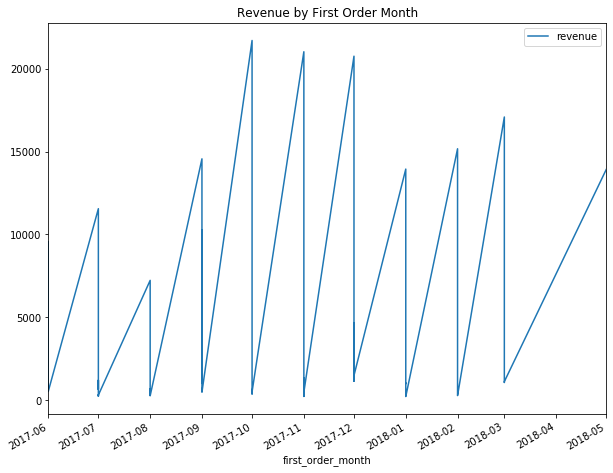

In [123]:
report_.plot.line(y='revenue', x='first_order_month', figsize=(10, 8), title='Revenue by First Order Month')

This graph shows that for each new cohort, the first order month is very large, then drops considerably. There may be users who spend once and do not come back. The heatmap of Revenue per User is consistent with the bottom points in this line chart.

### Step 3. Write a conclusion: advise marketing experts how much money to invest and where.
What sources/platforms would you recommend? Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?


I recommend Ad Source 1 for the greatest revenue per cost. Find out why Ad Source 3 is so expensive with such a small return. I recommend continuing spending primarily on desktop devices, and investigate why touch screens are so low. There may be additional market share if the 'touch' app is improved.

The first month purchases of any group is very high, then falls off sharply and remains low but steady. I think this reflects a large number of one time purchases and a small but steady number of loyal customers. The ROI increases each month for each loyal customer. I recommend pursuing some type of customer loyalty program targeted at the one time buyers.